In [2]:
#Import the necessary package
import numpy as np
import pandas as pd

# visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# datatime lib which is help to handling the datetime operation
from datetime import datetime 

In [3]:
ipl_data=pd.read_csv('ipl.csv')
ipl_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# To check whether null is present or not .we could see there no null values present below
ipl_data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


### We will see further more in this dataset 
### Which means we will see in the below some operation
1.Data Cleaning
2. Remove the unnecessary columns

In [6]:
ipl_data.columns


Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [7]:
remove_columns=['mid','venue','batsman','bowler','striker','non-striker']

print('Before Removing the columns:{}'.format(ipl_data.shape))
ipl_data.drop(remove_columns,axis=1,inplace=True) # inplace=True which means the changes will reflect in our DF
print('After remov the column:{}'.format(ipl_data.shape))

Before Removing the columns:(76014, 15)
After remov the column:(76014, 9)


In [8]:
# Yeah we successfully removed unnecessary columns
ipl_data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
ipl_data.index # DF always start index with zero

RangeIndex(start=0, stop=76014, step=1)

In [10]:
# below code showing the unique team names
ipl_data.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
team_names=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
            'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore', 
            'Delhi Daredevils', 'Sunrisers Hyderabad']

      

In [12]:
# keeping only the team names which is declared above
print('Before removing the some team name:{}'.format(ipl_data.shape))
ipl_data=ipl_data[(ipl_data['bat_team'].isin(team_names)) & (ipl_data['bowl_team'].isin(team_names))]
print('After removing the team name:{}'.format(ipl_data.shape))

Before removing the some team name:(76014, 9)
After removing the team name:(53811, 9)


In [13]:
ipl_data.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [14]:
# Removes the first 5 overs data in every match
ipl_data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
print('Before Removing the 5 overs of data:{}'.format(ipl_data.shape))
ipl_data=ipl_data[ipl_data['overs']>=5.0]
print('After removed the first 5 overs Data:{}'.format(ipl_data.shape))

Before Removing the 5 overs of data:(53811, 9)
After removed the first 5 overs Data:(40108, 9)


In [16]:
# Above Code is like every time i remove some column which which is reduced the rows 
# below i did that in to 2 ways one is using pandas another one is using datetime lib

In [17]:
# Converting the date column from string to Datetime object
ipl_data['date']=ipl_data['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

In [18]:
#pd.to_datetime(ipl_data.date)

In [19]:
# To perfom the correalted features using heatamp 
# you have to import some sort lib when you want to perform visualization and all
#Corr

corr_matrix=ipl_data.corr()
top_corr_feature=corr_matrix.index

C:\Users\karuppasamy.v\AppData\Local\Temp\ipykernel_8576\1299063069.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=ipl_data.corr()


<Axes: >

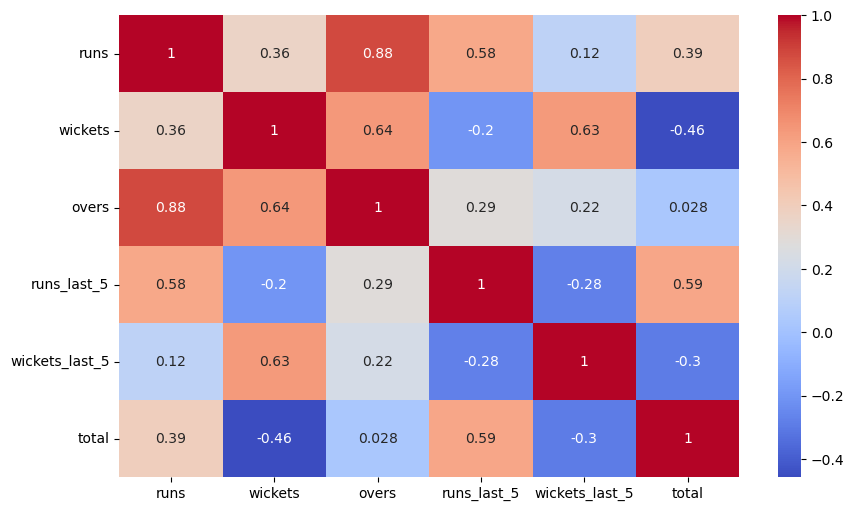

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(data=ipl_data[top_corr_feature].corr(),annot=True,cmap='coolwarm')

In [21]:
top_corr_feature

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'], dtype='object')

In [22]:
# Above we have done the data cleaning process.
# now we are moving to the next step that is for preprocessing 
# which is like we need to handle the catagorcial values
# and we will split the data into train and test 
# here below splitting the dataset into training and test set on the basis of date
ipl_data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [23]:
# here we can the 2 columns which is having the catogorical values col name is bat_team and bowl_team 
# now we will convert those 2 column to numerical col using pandas.getdummies method which we call it as one hot encoding

encoded_df=pd.get_dummies(data=ipl_data,columns=['bat_team','bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [24]:
# Rearranging the columns
encoded_df=encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [25]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [26]:
ipl_data.total.tail(5)

75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, dtype: int64

In [27]:
# Now above we have all the are numerical values so  now we are ready to split our data into train and test set

#X_train=
X_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test= encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

y_train=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test= encoded_df[encoded_df['date'].dt.year>=2017]['total'].values



In [28]:
X_train.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,59,1
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,59,1
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,58,1


In [29]:
encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,59,1
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,59,1
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.2,194,7,54,4
68858,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.3,200,7,56,4
68859,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.4,201,7,56,4
68860,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.5,202,7,57,4


In [30]:
#removing the date column
X_train=X_train.drop('date',axis=1)
X_test=X_test.drop('date',axis=1)


In [31]:
print('Training set:{} and Testing set:{}'.format(X_train.shape,X_test.shape))


Training set:(37330, 21) and Testing set:(2778, 21)


In [32]:
# Now we will enter the next process thats for model building
# here we will use some ML algorithm 


# Linear Regression


In [33]:
#here below the code which we have written in the linear Regression
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression()


In [34]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [35]:
# Predict the result
y_pred_lr=linear_regression.predict(X_test)

In [36]:
y_pred_lr

array([172.07093429, 175.2197967 , 174.61607874, ..., 100.37504751,
        99.80473879,  93.14382211])

In [37]:
# Now we could see some sort of results which is predict  our model
# now we will some error metrics

from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,accuracy_score

print('----------------Linear Regression-------------- Model Evaluation--------')
print('Mean Absolute Error(MAE):{}'.format(mae(y_test,y_pred_lr)))
print('Mean Squared Error(MSE):{}'.format(mse(y_test,y_pred_lr)))
print('Root Mean Squared Error(RMSE):{}'.format(np.sqrt(mse(y_test,y_pred_lr))))

----------------Linear Regression-------------- Model Evaluation--------
Mean Absolute Error(MAE):12.118617546193295
Mean Squared Error(MSE):251.0079231041742
Root Mean Squared Error(RMSE):15.8432295667321


# Decision Tree


In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
y_pred_dt=dtr.predict(X_test)

In [40]:
print('-------DecisionTree Regression -- Model Evaluation--------')
print('Mean Absolute Error(MAE):{}'.format(mae(y_test,y_pred_dt)))
print('Mean Squared Error(MSE):{}'.format(mse(y_test,y_pred_dt)))
print('Root Mean Squared Error(RMSE):{}'.format(np.sqrt(mse(y_test,y_pred_dt))))

-------DecisionTree Regression -- Model Evaluation--------
Mean Absolute Error(MAE):17.20482361411087
Mean Squared Error(MSE):532.7649388048956
Root Mean Squared Error(RMSE):23.081701384536096


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
y_pred_rfr=rfr.predict(X_test)


In [43]:
print('-------Random Forest Regression -- Model Evaluation--------')
print('Mean Absolute Error(MAE):{}'.format(mae(y_test,y_pred_rfr)))
print('Mean Squared Error(MSE):{}'.format(mse(y_test,y_pred_rfr)))
print('Root Mean Squared Error(RMSE):{}'.format(np.sqrt(mse(y_test,y_pred_rfr))))

-------Random Forest Regression -- Model Evaluation--------
Mean Absolute Error(MAE):13.76273242140629
Mean Squared Error(MSE):331.6968158640909
Root Mean Squared Error(RMSE):18.21254556244379


## **Predictions**
• Model *trained on* the data from **IPL Seasons 1 to 9** ie: (2008 to 2016)<br/>
• Model *tested on* data from **IPL Season 10** ie: (2017)<br/>
• Model *predicts on* data from **IPL Seasons 11 to 12** ie: (2018 to 2019)


* Here  I have done some operation which i have mentioned aobve

In [44]:
# Now we will pass the sample data and predict the how many runs will score that team 

In [46]:
def predict_score(batting_team='Chennai Super Kings',bowling_team='Mumbai Indians',overs=5.1,runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    
    temp_array=list()
    # batting team
    if batting_team=='Chennai Super Kings':
        temp_array=temp_array+[1,0,0,0,0,0,0,0]
    elif batting_team=='Delhi Daredevils':
        temp_array=temp_array+[0,1,0,0,0,0,0,0]
    elif batting_team=='Kings XI Punjab':
        temp_array=temp_array+[0,0,1,0,0,0,0,0]
    elif batting_team=='Kolkata Knight Riders':
        temp_array=temp_array+[0,0,0,1,0,0,0,0]
    elif batting_team=='Mumbai Indians':
        temp_array=temp_array+[0,0,0,0,1,0,0,0]
    elif batting_team=='Rajasthan Royals':
        temp_array=temp_array+[0,0,0,0,0,1,0,0]
    elif batting_team=='Royal Challengers Bangalore':
        temp_array=temp_array+[0,0,0,0,0,0,1,0]
    elif batting_team=='Sunrisers Hyderabad':
        temp_array+=[0,0,0,0,0,0,1,0]
        
    # Bowling  team
    if bowling_team=='Chennai Super Kings':
        temp_array=temp_array+[1,0,0,0,0,0,0,0]
    elif bowling_team=='Delhi Daredevils':
        temp_array=temp_array+[0,1,0,0,0,0,0,0]
    elif bowling_team=='Kings XI Punjab':
        temp_array=temp_array+[0,0,1,0,0,0,0,0]
    elif bowling_team=='Kolkata Knight Riders':
        temp_array=temp_array+[0,0,0,1,0,0,0,0]
    elif bowling_team=='Mumbai Indians':
        temp_array=temp_array+[0,0,0,0,1,0,0,0]
    elif bowling_team=='Rajasthan Royals':
        temp_array=temp_array+[0,0,0,0,0,1,0,0]
    elif bowling_team=='Royal Challengers Bangalore':
        temp_array=temp_array+[0,0,0,0,0,0,1,0]
    elif bowling_team=='Sunrisers Hyderabad':
        temp_array+=[0,0,0,0,0,0,1,0]
    
    # we have dummy values for every team now we wil add this to over,wick and all which we get all this above method
    
    temp_array=temp_array+[overs,runs, wickets, runs_in_prev_5, wickets_in_prev_5]
    
    # now we have all the data .now we will convert this into numpy array
    
    temp_array=np.array([temp_array])
    
    return int(linear_regression.predict(temp_array)[0])
    
    

In [47]:
import pickle

file=open('model.pkl','wb')

pickle.dump(linear_regression,file)

In [295]:
# you will get the prediction when you pass sample data into above function

### **Prediction 1**
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9


In [298]:
final_score=predict_score(batting_team='Kolkata Knight Riders',bowling_team='Delhi Daredevils',overs=9.2,runs=79,wickets=2,runs_in_prev_5=60,wickets_in_prev_5=1)
print('Kolkata Knight Riders will score between {} and {}'.format(final_score-10,final_score+5))

Kolkata Knight Riders will score between 159 and 174


C:\Users\karuppasamy.v\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Prediction 2**
• Date: 16th April 2019<br/>
• IPL : Season 11<br/>
• Match number: 15<br/>
• Teams: Chennai Super Kings vs. Delhi Daredevils<br/>
• First Innings final score: 200/9


In [307]:
final_score=predict_score(batting_team='Chennai Super Kings',bowling_team='Delhi Daredevils',overs=7.2,runs=80,wickets=2,runs_in_prev_5=38,wickets_in_prev_5=0)
print('Chennai Super Kings will score between {} and {}'.format(final_score-10,final_score+5))

Chennai Super Kings will score between 178 and 193


C:\Users\karuppasamy.v\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Prediction 3**
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>


In [308]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print('Mumbai Indians will score between {} and {}'.format(final_score-10,final_score+5))

Mumbai Indians will score between 180 and 195


C:\Users\karuppasamy.v\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Prediction 5**
• Date: 11th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 25<br/>
• Teams: Rajasthan Royals vs. Chennai Super Kings<br/>
• First Innings final score: 151/7


In [309]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print('Rajasthan Royals will score between {} and {}'.format(final_score-10,final_score+5))

Rajasthan Royals will score between 128 and 143


C:\Users\karuppasamy.v\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


*Note: In IPL it is difficult to predict the exact score because match can change in any moment*
